In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
N_POP = 100
N_GEN = 20

N_DIM = 2

F = 0.42
CR = 0.5

random_shift = 2*np.random.random((N_DIM))
print (random_shift)

[1.01359368 1.46114095]


In [40]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=20):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return pt

pop = [generate_random_point() for ix in range(N_POP)]
temp = []
losses = []

Best loss: 2.582041913419122
Best loss: 0.17373600855851823
Best loss: 0.17373600855851823
Best loss: 0.12004803629221246
Best loss: 0.12004803629221246
Best loss: 0.026653348038836185
Best loss: 0.019982021096702593
Best loss: 0.004834400104538433
Best loss: 0.001912287540068259
Best loss: 0.0001198753909280623
Best loss: 0.0001198753909280623
Best loss: 1.5667277356239673e-06
Best loss: 1.5667277356239673e-06
Best loss: 1.5667277356239673e-06
Best loss: 3.309151414622669e-08
Best loss: 3.309151414622669e-08
Best loss: 3.309151414622669e-08
Best loss: 3.309151414622669e-08
Best loss: 2.4271598291148696e-09
Best loss: 2.4271598291148696e-09


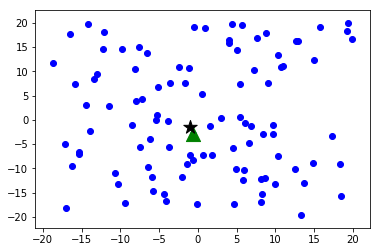

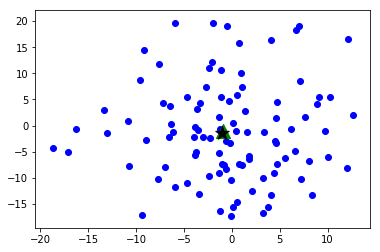

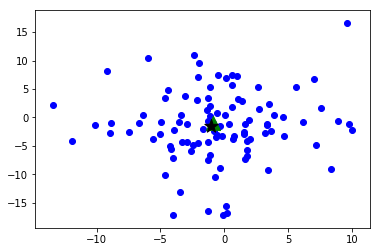

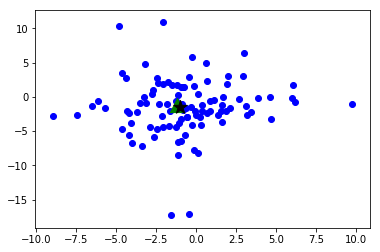

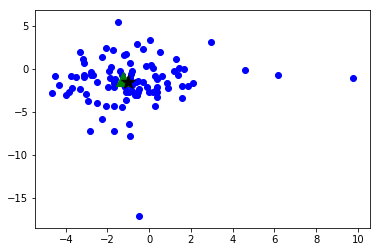

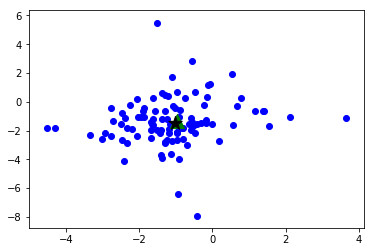

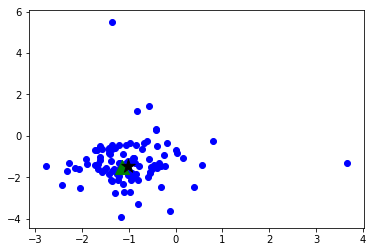

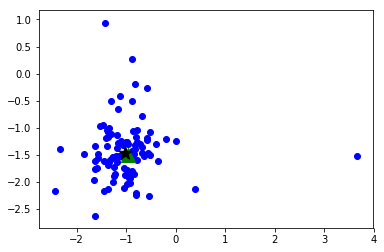

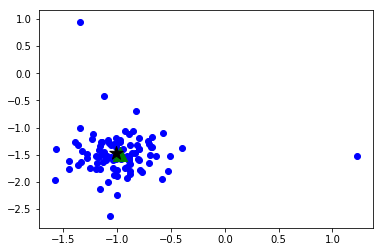

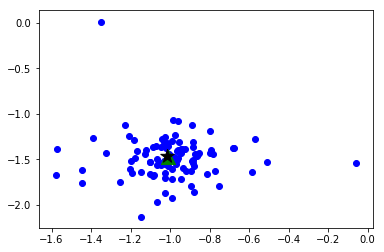

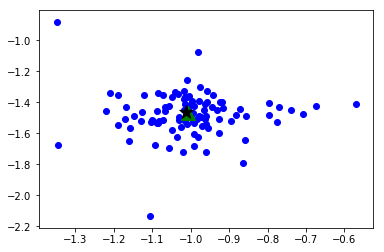

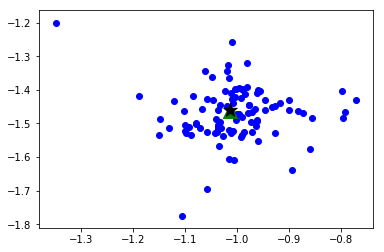

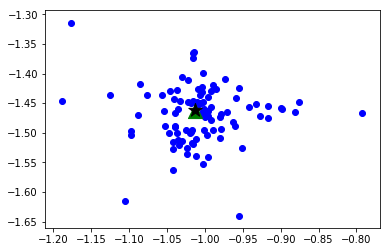

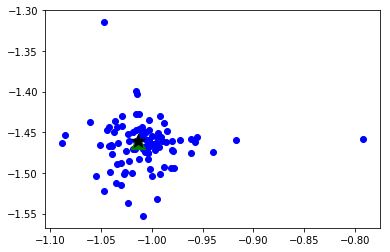

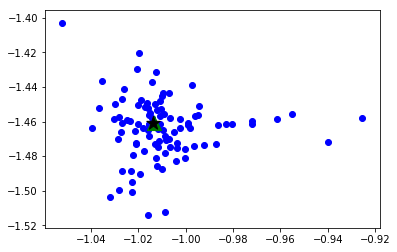

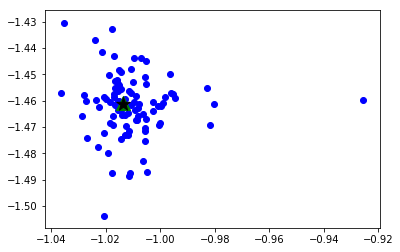

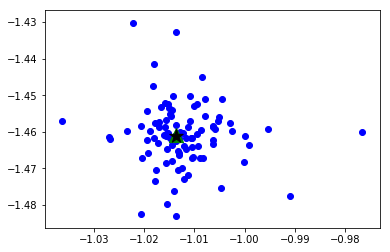

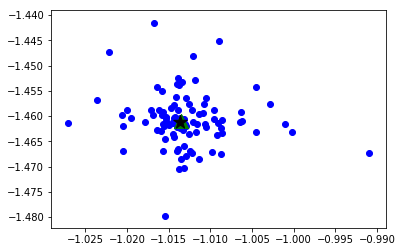

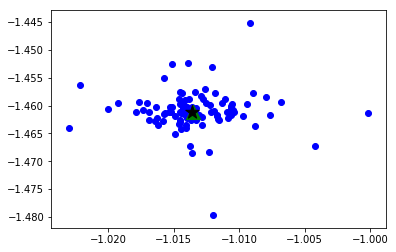

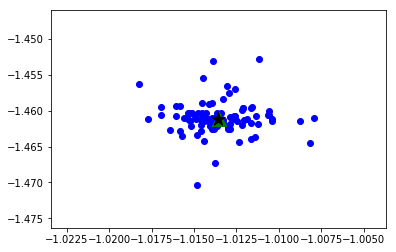

In [41]:
for gen in range(N_GEN):
    ord_pop = sorted(pop, key=lambda x: loss(x))
    
    best = ord_pop[0]
    print ("Best loss:", loss(best))# , best)
    losses.append(loss(best))
    
    plt.figure(gen)
    for ix in ord_pop:
        plt.scatter(ix[0], ix[1], color='blue')
    plt.scatter(best[0], best[1], color='green', marker='^', s=200)
    plt.scatter(-random_shift[0], -random_shift[1], color='black', marker='*', s=200)
    
    for ix in range(N_POP):
        x = pop[ix]
        a, b, c = random.sample(pop, 3)
        while (list(a) == list(x)) or (list(b) == list(x)) or (list(c) == list(x)):
            a, b, c = random.sample(pop, 3)
        
        t = best + F*(x-c)#a + F*(b-c)#
#         print (t)
        
        R = int(np.random.random() * N_DIM)
        y = np.copy(x)
        
        for j in range(N_DIM):
            if (np.random.random() < CR) or (j==R):
                y[j] = t[j]
            else:
                y[j] = x[j]
        
        if loss(y) < loss(x):
            pop[ix] = y
        else:
            pass
plt.show()

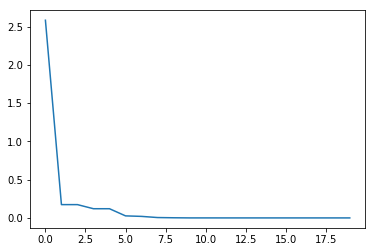

In [42]:
plt.plot(losses)
plt.show()